# Actividad NLP - 1.0 - Creación de Diccionario

### Musel Tabares
### A00830710

## Contador de palabras

In [85]:
#Importamos librerias
import matplotlib.pyplot as plt
import string
import numpy as np
import nltk
from nltk.corpus import stopwords


In [90]:
#Funciones auxiliares para leer archivo y guardarlo en un diccionario
def list_from_file(filename):
    myfile = open(filename, 'r')
    data = myfile.read().split()
    col = []
    for word in data:
        col.append(word)
    myfile.close()
    return col

def myhist(col):
    hist = {}
    for word in col:
        word = word.lower()
        #quitamos signos de puntacion y espacios
        word = word.strip(string.punctuation + string.whitespace)
        #omitimos stopwords y palabras no alfabeticas
        stop_words = set(stopwords.words('english'))
        if (word not in stop_words) and (word.isalpha()):
            hist[word] = hist.get(word, 0)+1
    return hist

In [91]:
#leer archivo y guardarlo en un diccionario
col = list_from_file('les_miserables.txt')
colf = myhist(col)

In [93]:
#ordenamos el diccionario por frecuencia
colf_sorted = dict(sorted(colf.items(), key=lambda item: item[1], reverse=True))

### Limpieza de palabras

In [94]:
#seleccionamos los primeros 100 elementos
top_100 = {k: colf_sorted[k] for k in list(colf_sorted)[:100]}

### Histograma de las 100 palabras mas frecuentes

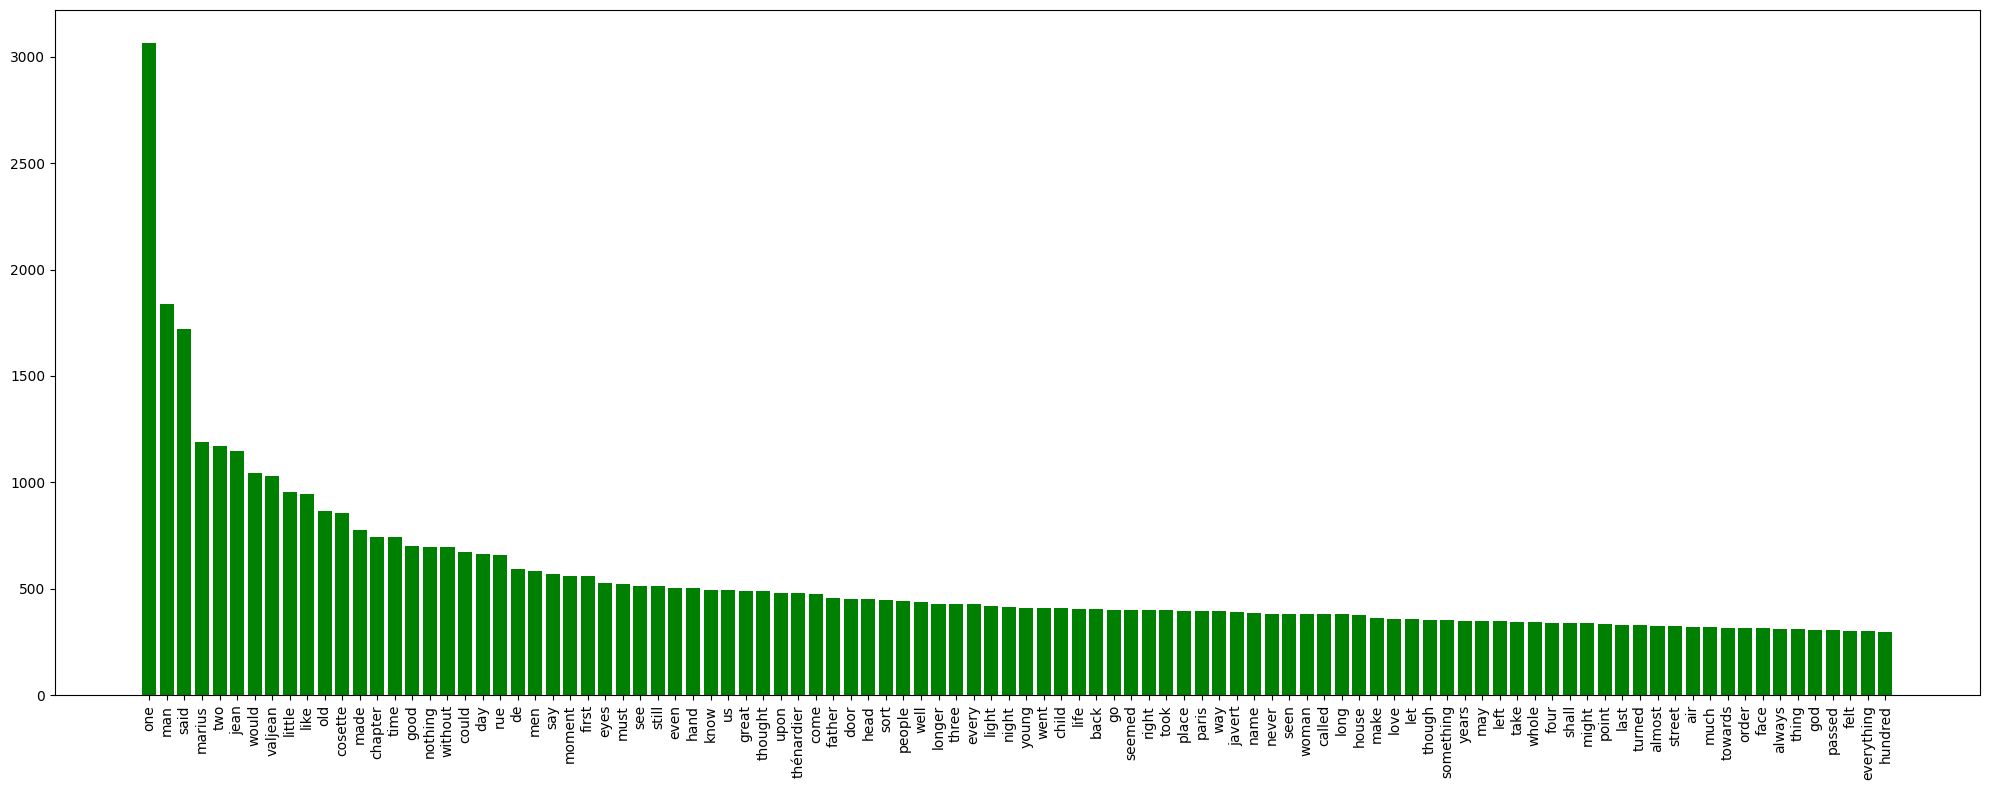

In [95]:
#graficamos
plt.figure(figsize=(20,8))
plt.bar(list(top_100.keys()), top_100.values(), color='g')
plt.xticks(rotation='vertical')
plt.tight_layout()

### Nube de palabras de las 100 mas frecuentes

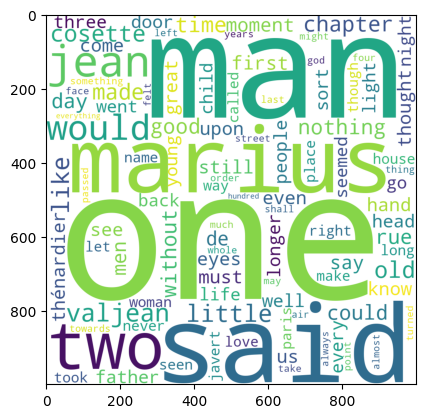

In [96]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(colf)
plt.imshow(wc)

## Bonus: (opcional)

### Creación de un diccionario de palabras.

In [97]:
diccionario = list(colf_sorted.keys())

### Realizar una corrección del texto con respecto al diccionario usando cálculo de distancia de “strings”.

In [98]:
def correcion(s1):
    distancias = [] #array que guardara cada una de las distancia, por cada palabra
    #calculamos distancia de levenshtein para cada palabra dentro del diccionario 
    for i in range(len(diccionario)):
        s2 = diccionario[i] # palabra del diccionario actual
        distance  = nltk.edit_distance(s1, s2, substitution_cost=1, transpositions=False) # calculo de distancia
        distancias.append(distance) # guardamos distancia
    index_min = np.argmin(distancias) # nos quedamos con el indice de la palabra con menor distancia
    return diccionario[index_min],distancias[index_min]


In [99]:
palabra = "caprishious"
palabra_corregida, distancia_edicion = correcion(palabra)
print(f'''
Palabra original: {palabra}
La correcion de su palabra es: {palabra_corregida}
Distancia de levenshtein de: {distancia_edicion}
''')


Palabra original: caprishious
La correcion de su palabra es: capricious
Distancia de levenshtein de: 2

